## Objective 1: Data Cleaning With EDA


In [7]:
import numpy as np
import seaborn as sns
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, classification_report
)

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score



In [8]:
df= pd.read_csv("Autocomp - Companies list (CA-1).csv")
df.head()

,Name of the company,Location,Listed,Products,Revenue,EBITDA (IN MILLIONS),Website
0,3DS LIGHTING SOLUTIONS PVT LTD,NaN,NaN,NaN,NaN,NaN,NaN
1,99 AUTO FLASH,NaN,NaN,NaN,NaN,NaN,NaN
2,A.R SPARES PVT LTD,NaN,NaN,NaN,NaN,NaN,NaN
3,AARCO INDUSTRIES PVT LTD,JALANDHAR,NO,"Our range comprises Axle Spindle, Steel Spindl...",NaN,NaN,https://aarcoindustries.com/
4,ABATEK (ASIA) PUBLIC COMPANY LIMITED,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df= pd.read_csv("Autocomp - Companies list (CA-1).csv")

df = df.drop_duplicates()
df = df.dropna()
df = df.replace([np.inf, -np.inf], np.nan)
df = df.reset_index(drop=True)
print(df.shape)
print(df.info())
print(df.describe())
print(df.isna().sum())
print(df.nunique())
df.head(10)

(236, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name of the company   236 non-null    object
 1   Location              236 non-null    object
 2   Listed                236 non-null    object
 3   Products              236 non-null    object
 4   Revenue               236 non-null    object
 5   EBITDA (IN MILLIONS)  236 non-null    object
 6   Website               236 non-null    object
dtypes: object(7)
memory usage: 13.0+ KB
None
                         Name of the company Location Listed  \
count                                    236      236    236   
unique                                   236       38      2   
top     ABILITIES INDIA PISTONS & RINGS LTD.  HARYANA     NO   
freq                                       1       34    209   

                Products        Revenue  EBITDA (IN MILLIONS)  \
count

,Name of the company,Location,Listed,Products,Revenue,EBITDA (IN MILLIONS),Website
0,ABILITIES INDIA PISTONS & RINGS LTD.,DELHI,NO,PISTON AND RINGS,1103.43 (2023),140.41 (2023),http://aippistons.com/
1,ACCOLADE ELECTRONICS PRIVATE LIMITED,PUNE,NO,"LED (light-emitting diode) emergency light, in...",1275.45 (2023),146.97 (2023),http://accoladeelectronics.com/
2,ADITYA AUTOS,BANGALORE,NO,"window regulators, door latches, tailgate latc...",6384.40 (2024),357.20 (2024),http://www.adityaauto.com/
3,ADVIK HI-TECH PRIVATE LIMITED,PUNE,NO,"lifter tensioner, oil pumps, fuel cocks – man...",6771.60 (2024),1724.9 (2024),http://www.advik.co.in/
4,ALF ENGINEERING PVT. LTD.,MUMBAI,NO,"chassis, hydroformed parts, suspension assembl...",13920.06 (2023),1526.56 (2023),http://www.alfengineering.com/
5,ALICON CASTALLOY LTD.,PUNE,YES,"cylinder heads, support brackets, intake manif...",13923.14 (2024),1736.42 (2024),http://alicongroup.co.in/
6,ALKRAFT THERMOTECHNOLOGIES PRIVATE LIMITED,JAMSHEDPUR,NO,"radiators, charge air coolers, modular systems...",983.57 (2022),47.96 (2022),http://www.alkraft.com/
7,ALLENA AUTO INDUSTRIES PVT LTD,"MOHALI, PUNJAB",NO,"water pumps, oil filter, pump assemblies, wate...",2755 (2023),167.26 (2023),http://www.allenaauto.com/
8,ALLIED TRANSMISSION AND GEARS PRIVATE LIMITED,SONEPAT,NO,mercedes transmission parts include automatic ...,147.92 (2023),23.09 (2023),http://www.alliedtransmission.in/
9,ALMIGHTY AUTO ANCILLARY PVT. LTD.,MUMBAI,NO,"wiper motors, wiper linkages, wiper arms, wipe...",437.06 (2021),28.19 (2021),http://www.almity.com/


## Objective 2: Dimensionality Reduction using PCA & Pairplot


        PC1       PC2
0 -2.628323 -0.672789
1 -2.539745 -1.279336
2 -1.866283  1.650854
3 -1.972933  0.341492
4 -2.284154 -1.172036


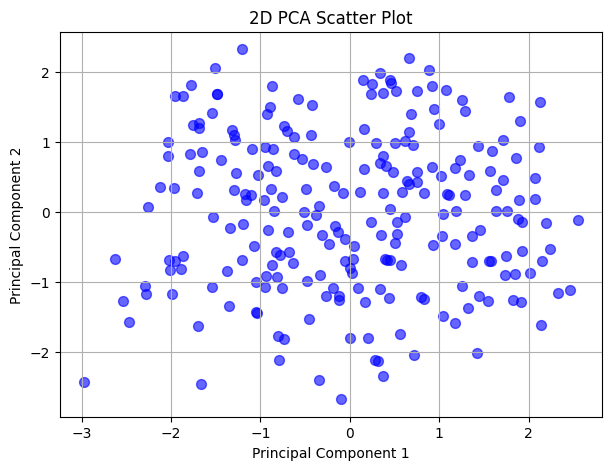

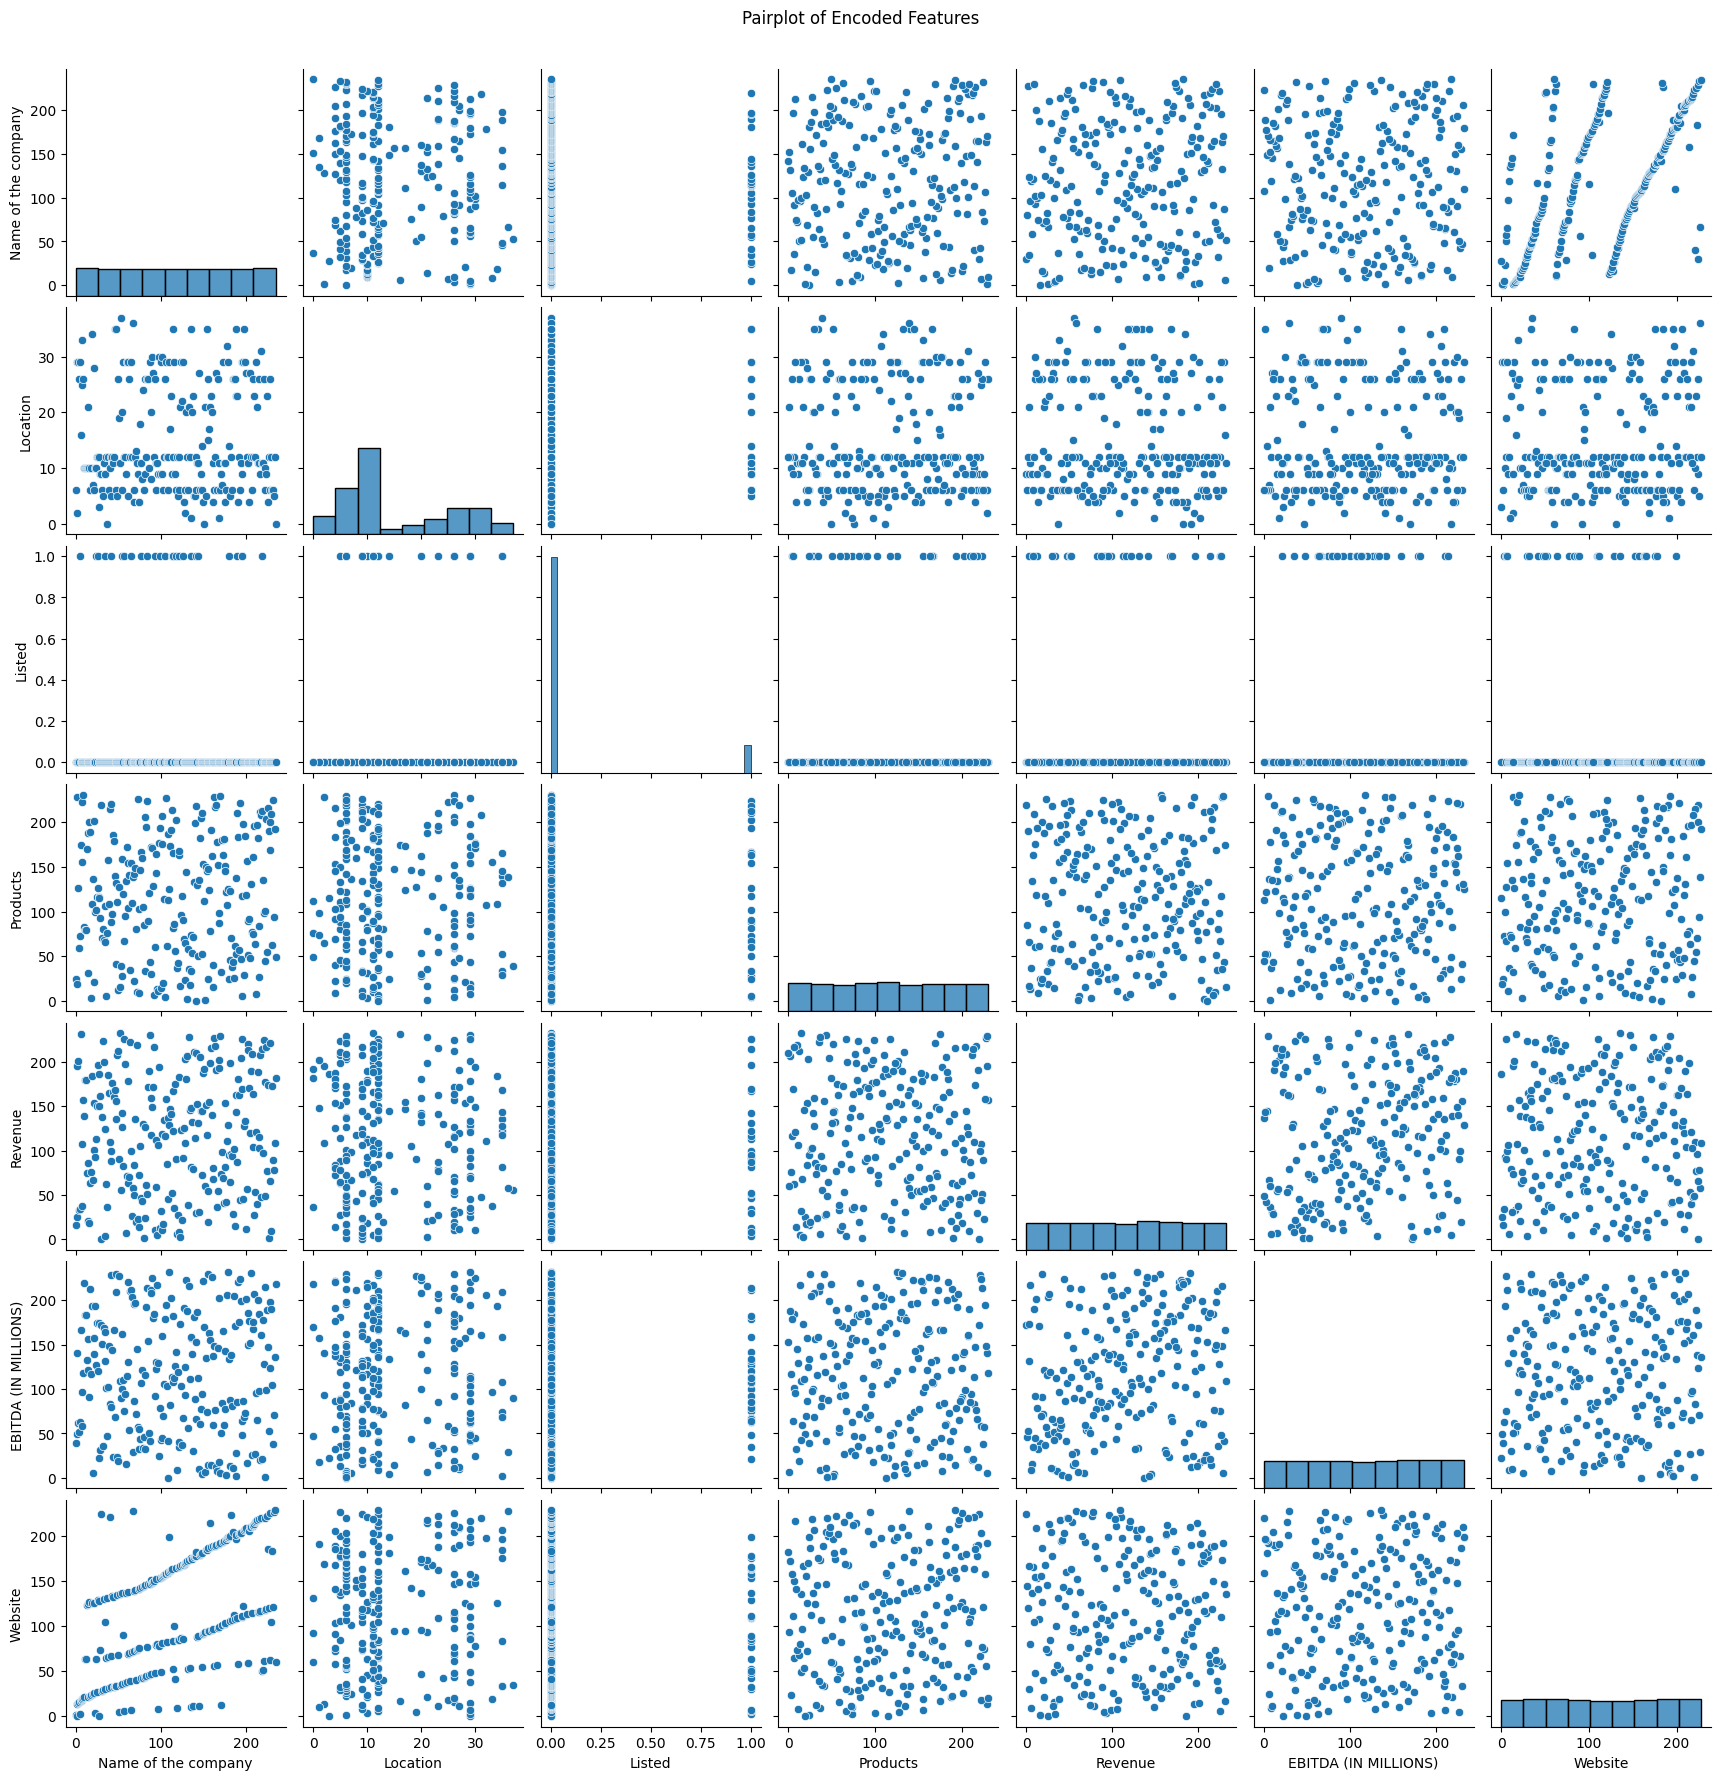

In [67]:
df2 = df.copy()

for col in df2.columns:
    df2[col] = df2[col].astype(str).str.strip()

# ------------------------------
# 2. LABEL ENCODING (Because no numeric columns exist)
# ------------------------------
le = LabelEncoder()
df_encoded = df2.copy()

for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# ------------------------------
# 3. SCALING
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ------------------------------
# 5. RESULT DATAFRAME
# ------------------------------
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print(pca_df.head())

# -------------------- 4. Scatter Plot of PCA --------------------
plt.figure(figsize=(7,5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=50, c='blue', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Scatter Plot')
plt.grid(True)
plt.show()

# -------------------- 5. Pairplot of Encoded Features --------------------
sns.pairplot(df_encoded)
plt.suptitle("Pairplot of Encoded Features", y=1.02)
plt.show()


## Objective 3: Clustering using KMeans, Agglomerative Clustering with Scatter Maps





Columns: ['Name of the company', 'Location', 'Listed', 'Products', 'Revenue', 'EBITDA (IN MILLIONS)', 'Website']


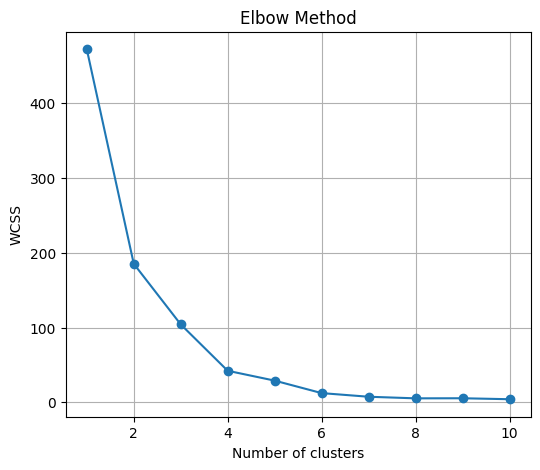


===== KMEANS METRICS =====
Silhouette Score: 0.8509720384115349
Davies-Bouldin Score: 0.46505093286320437
Calinski-Harabasz Score: 480.42234581032454
Inertia (WCSS): 92.11918499273733
Cluster Counts: [224   1  11]


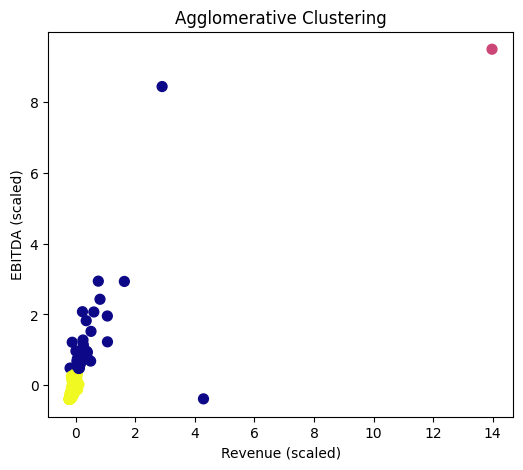

===== Agglomerative Clustering Metrics =====
Silhouette Score: 0.7881050691084239
Davies-Bouldin Score: 0.4945366840444339
Calinski-Harabasz Score: 433.8254631960743
Cluster Counts: {np.int64(0): np.int64(30), np.int64(1): np.int64(1), np.int64(2): np.int64(205)}


In [12]:
# Clean column names
df.columns = df.columns.str.strip()

# Check existence
print("Columns:", df.columns.tolist())

# Clean Revenue
df['Revenue'] = (
    df['Revenue']
    .astype(str)
    .str.replace(',', '', regex=True)
    .str.extract(r'(\d+\.?\d*)')[0]
    .astype(float)
)

# Clean EBITDA
df['EBITDA (IN MILLIONS)'] = (
    df['EBITDA (IN MILLIONS)']
    .astype(str)
    .str.replace(',', '', regex=True)
    .str.extract(r'(\d+\.?\d*)')[0]
    .astype(float)
)


X = df[['Revenue', 'EBITDA (IN MILLIONS)']].values

# -------------------- Standardize --------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------- KMeans --------------------
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

# -------------------- Apply KMeans --------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
klabels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# KMeans Metrics
print("\n===== KMEANS METRICS =====")
print("Silhouette Score:", silhouette_score(X_scaled, klabels))
print("Davies-Bouldin Score:", davies_bouldin_score(X_scaled, klabels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, klabels))
print("Inertia (WCSS):", kmeans.inertia_)
print("Cluster Counts:", np.bincount(klabels))


# -------------------- Agglomerative Clustering --------------------
# Choose optimal number of clusters (e.g., 3) and linkage
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')  # try 'complete' or 'average' too
labels = agg.fit_predict(X_scaled)

# -------------------- Scatter Plot --------------------
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='plasma', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Revenue (scaled)')
plt.ylabel('EBITDA (scaled)')
plt.show()

# -------------------- Metrics --------------------
print("===== Agglomerative Clustering Metrics =====")
print("Silhouette Score:", silhouette_score(X_scaled, labels))
print("Davies-Bouldin Score:", davies_bouldin_score(X_scaled, labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, labels))
unique, counts = np.unique(labels, return_counts=True)
print("Cluster Counts:", dict(zip(unique, counts)))


## Objective 4: Classification using SVM & Decision Trees with Confusion Matrix


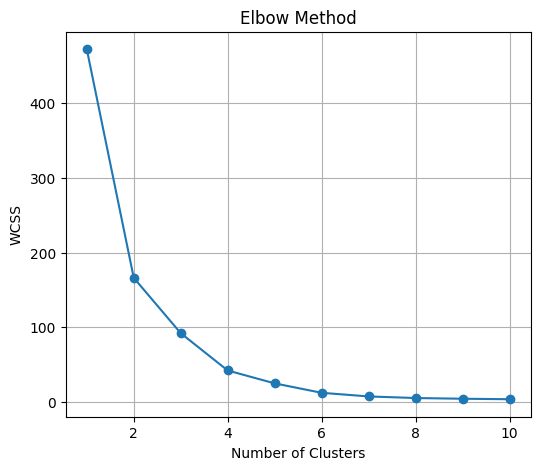

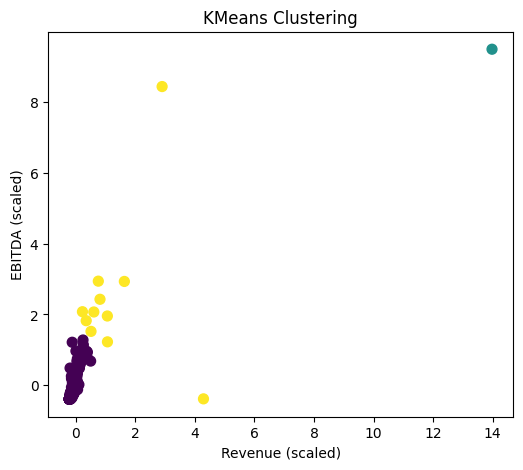


===== KMEANS METRICS =====
Silhouette Score        : 0.8509720384115349
Davies-Bouldin Score    : 0.46505093286320437
Calinski-Harabasz Score : 480.42234581032454
Cluster Counts          : [224   1  11]


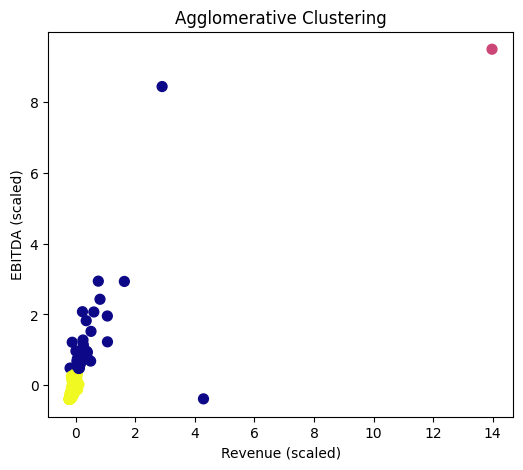


===== AGGLOMERATIVE METRICS =====
Silhouette Score        : 0.7881050691084239
Davies-Bouldin Score    : 0.4945366840444339
Calinski-Harabasz Score : 433.8254631960743

===== SVC RESULTS =====
Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
[[23  0  1]
 [ 0 22  2]
 [ 2  4 17]]
              precision    recall  f1-score   support

        High       0.92      0.96      0.94        24
         Low       0.85      0.92      0.88        24
      Medium       0.85      0.74      0.79        23

    accuracy                           0.87        71
   macro avg       0.87      0.87      0.87        71
weighted avg       0.87      0.87      0.87        71


===== DECISION TREE RESULTS =====
[[24  0  0]
 [ 0 24  0]
 [ 0  0 23]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        24
         Low       1.00      1.00      1.00        24
      Medium       1.00      1.00      1.00        23

    accuracy                           1

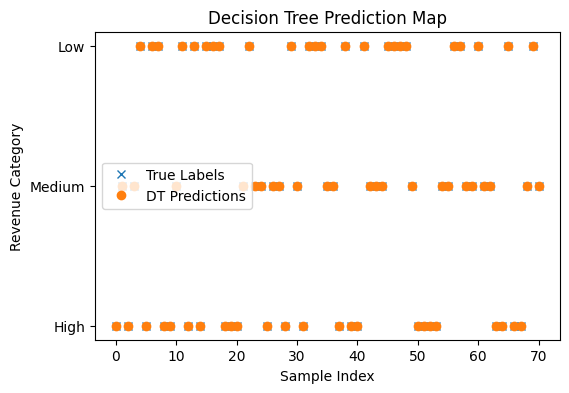

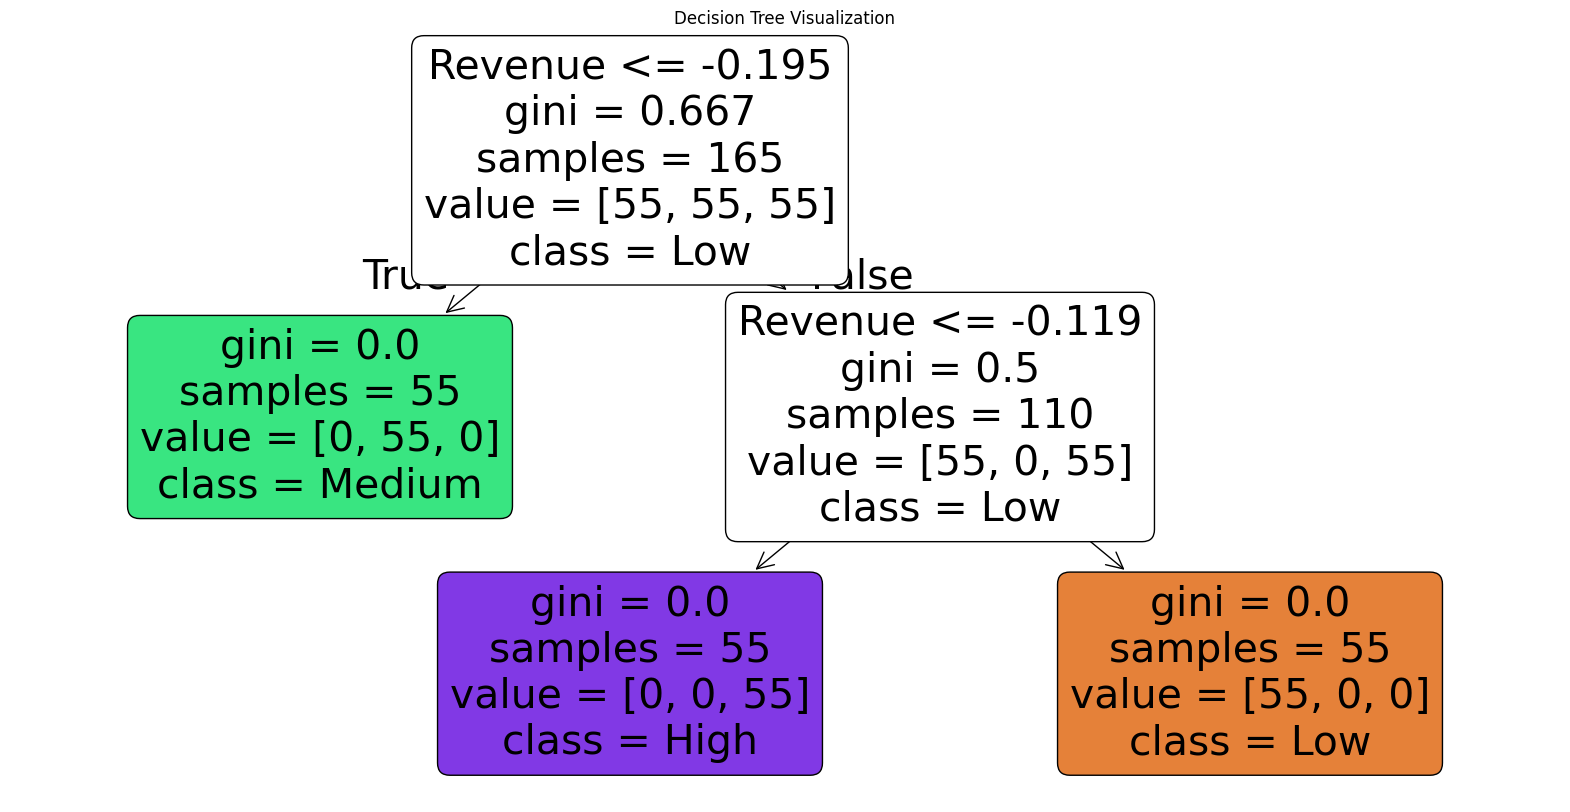

In [17]:
# =====================================================
# IMPORT LIBRARIES
# =====================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score,
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, classification_report
)

# =====================================================
# CLEAN COLUMN NAMES
# =====================================================
df.columns = df.columns.str.strip()

# Column names (adjust ONLY if names differ)
rev_col = 'Revenue'
ebitda_col = 'EBITDA (IN MILLIONS)'

# =====================================================
# CLEAN NUMERIC DATA
# =====================================================
df[rev_col] = (
    df[rev_col]
    .astype(str)
    .str.replace(',', '', regex=True)
    .str.extract(r'(\d+\.?\d*)')[0]
    .astype(float)
)

df[ebitda_col] = (
    df[ebitda_col]
    .astype(str)
    .str.replace(',', '', regex=True)
    .str.extract(r'(\d+\.?\d*)')[0]
    .astype(float)
)

# =====================================================
# CREATE TARGET VARIABLE (CLASSIFICATION)
# =====================================================
df['Revenue_cat'] = pd.qcut(
    df[rev_col],
    q=3,
    labels=['Low', 'Medium', 'High']
)

# =====================================================
# CLEAN DATAFRAME
# =====================================================
df_clean = df.dropna(subset=[rev_col, ebitda_col, 'Revenue_cat'])

# =====================================================
# FEATURES & TARGET
# =====================================================
X = df_clean[[rev_col, ebitda_col]].values
y = df_clean['Revenue_cat']

# =====================================================
# STANDARDIZATION
# =====================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =====================================================
# ================= CLUSTERING ========================
# =====================================================

# ----------------- ELBOW METHOD -----------------
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(6,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# ----------------- KMEANS -----------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
klabels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=klabels, cmap='viridis', s=50)
plt.title('KMeans Clustering')
plt.xlabel('Revenue (scaled)')
plt.ylabel('EBITDA (scaled)')
plt.show()

print("\n===== KMEANS METRICS =====")
print("Silhouette Score        :", silhouette_score(X_scaled, klabels))
print("Davies-Bouldin Score    :", davies_bouldin_score(X_scaled, klabels))
print("Calinski-Harabasz Score :", calinski_harabasz_score(X_scaled, klabels))
print("Cluster Counts          :", np.bincount(klabels))

# ----------------- AGGLOMERATIVE -----------------
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg.fit_predict(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=agg_labels, cmap='plasma', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Revenue (scaled)')
plt.ylabel('EBITDA (scaled)')
plt.show()

print("\n===== AGGLOMERATIVE METRICS =====")
print("Silhouette Score        :", silhouette_score(X_scaled, agg_labels))
print("Davies-Bouldin Score    :", davies_bouldin_score(X_scaled, agg_labels))
print("Calinski-Harabasz Score :", calinski_harabasz_score(X_scaled, agg_labels))

# =====================================================
# ================= CLASSIFICATION ====================
# =====================================================

# ----------------- TRAIN TEST SPLIT -----------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------- SVC -----------------
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_svc = grid.best_estimator_
svc_pred = best_svc.predict(X_test)

print("\n===== SVC RESULTS =====")
print("Best Params:", grid.best_params_)
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred, zero_division=0))

# ----------------- DECISION TREE -----------------
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("\n===== DECISION TREE RESULTS =====")
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred, zero_division=0))

# ----------------- PREDICTION MAP -----------------
plt.figure(figsize=(6,4))
plt.plot(y_test.values, 'x', label='True Labels')
plt.plot(dt_pred, 'o', label='DT Predictions')
plt.title('Decision Tree Prediction Map')
plt.xlabel('Sample Index')
plt.ylabel('Revenue Category')
plt.legend()
plt.show()

# ----------------- TREE VISUALIZATION -----------------
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=[rev_col, ebitda_col],
    class_names=['Low', 'Medium', 'High'],
    filled=True,
    rounded=True
)
plt.title('Decision Tree Visualization')
plt.show()


## Objective 5: Regression using Linear & RandomForest Regression with Line Maps






--- Linear Regression Metrics ---
MAE: 335.83581973844457
MSE: 229605.06955841449
RMSE: 479.17123198123494
R²: 0.5041587773291747


--- Random Forest Regression Metrics ---
MAE: 218.75826458333339
MSE: 203494.32741629911
RMSE: 451.10345533624445
R²: 0.5605459569915788




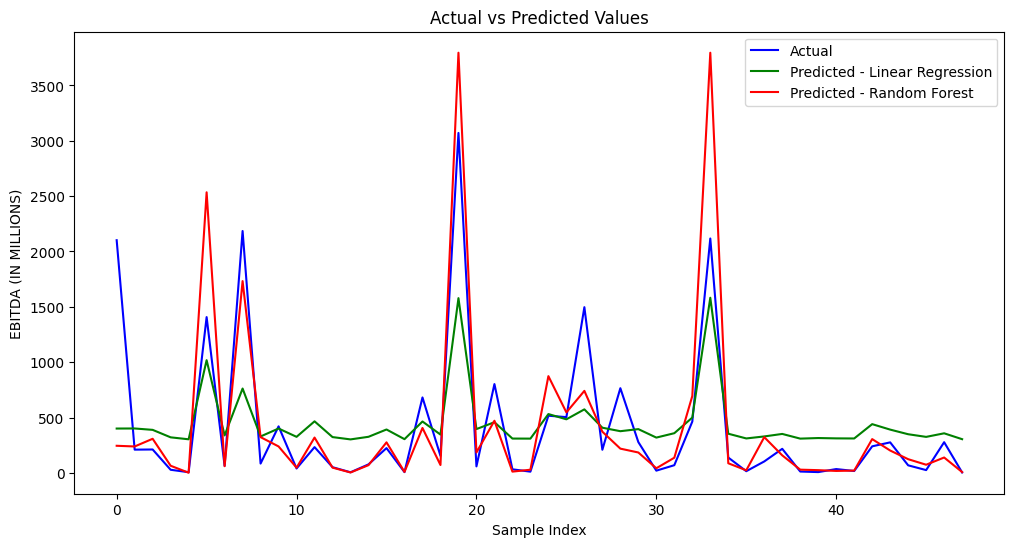

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# =====================================================
# CLEAN COLUMN NAMES
# Assuming you want to predict EBITDA

target_col = ebitda_col

# Drop rows with missing values in features or target
df_clean = df.dropna(subset=[rev_col, target_col])

X = df_clean[[rev_col]]  # Using Revenue as feature to predict EBITDA
y = df_clean[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation metrics
def print_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} Metrics ---")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²:", r2_score(y_true, y_pred))
    print("\n")

print_metrics(y_test, y_pred_lr, "Linear Regression")
print_metrics(y_test, y_pred_rf, "Random Forest Regression")

# Visualization - Line Maps (Actual vs Predicted)
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_lr, label='Predicted - Linear Regression', color='green')
plt.plot(y_pred_rf, label='Predicted - Random Forest', color='red')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel(target_col)
plt.show()



## Objective 6: Ensemble Learning using Voting & Bagging Classifier with Feature Maps





===== Voting Classifier =====
Accuracy: 0.9577464788732394
Precision: 0.9510233918128655
Recall: 0.9618390804597702
F1-score: 0.9552253649998012

Confusion Matrix:
 [[28  1  0]
 [ 0 23  2]
 [ 0  0 17]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.96      0.92      0.94        25
           2       0.89      1.00      0.94        17

    accuracy                           0.96        71
   macro avg       0.95      0.96      0.96        71
weighted avg       0.96      0.96      0.96        71


===== Bagging Classifier =====
Accuracy: 0.9859154929577465
Precision: 0.9871794871794872
Recall: 0.9885057471264368
F1-score: 0.9876160990712074

Confusion Matrix:
 [[28  1  0]
 [ 0 25  0]
 [ 0  0 17]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.96      1.00      0.98        25

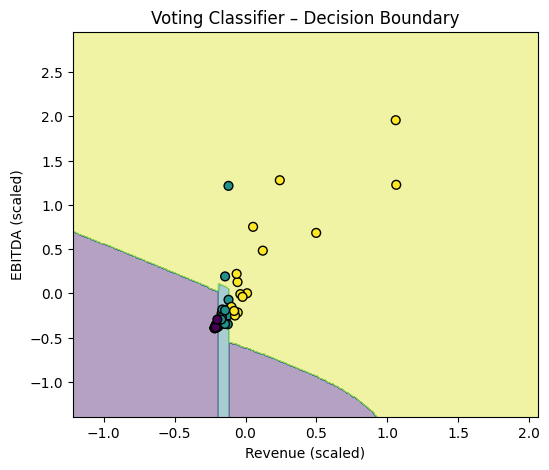

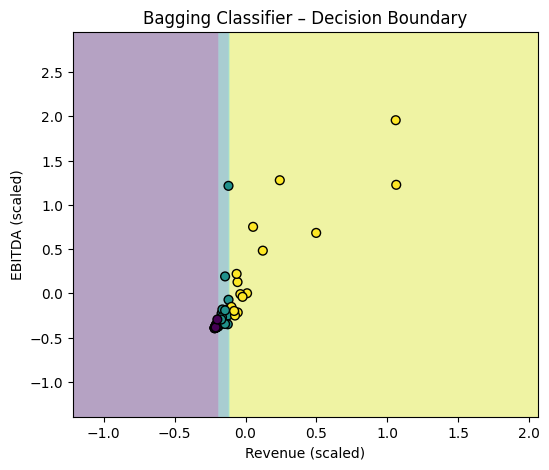

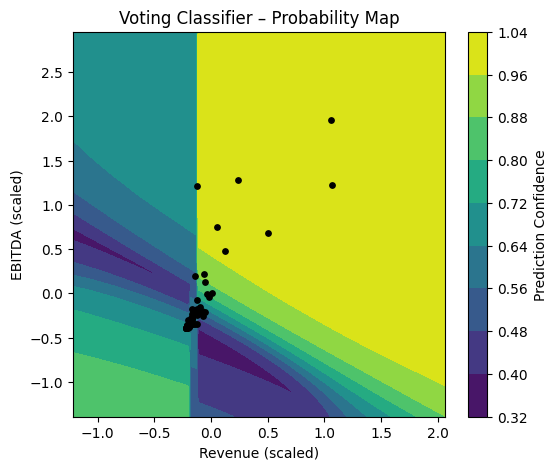

In [20]:
# =========================
# IMPORT LIBRARIES
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

# =========================
# LOAD DATA
# # =========================
# df = pd.read_csv(".csv")   # 🔴 CHANGE FILE NAME IF NEEDED
# df.columns = df.columns.str.strip()

# =========================
# CLEAN NUMERIC COLUMNS
# =========================
df['Revenue'] = (
    df['Revenue'].astype(str)
    .str.extract(r'([\d,.]+)')
    .replace(',', '', regex=True)
    .astype(float)
)

df['EBITDA (IN MILLIONS)'] = (
    df['EBITDA (IN MILLIONS)'].astype(str)
    .str.extract(r'([\d,.]+)')
    .replace(',', '', regex=True)
    .astype(float)
)

df = df.dropna(subset=['Revenue', 'EBITDA (IN MILLIONS)'])

# =========================
# CREATE TARGET VARIABLE
# =========================
df['Revenue_cat'] = pd.qcut(df['Revenue'], q=3, labels=[0, 1, 2])

# =========================
# FEATURES & TARGET
# =========================
X = df[['Revenue', 'EBITDA (IN MILLIONS)']].values
y = df['Revenue_cat'].values

# =========================
# SCALE FEATURES
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================
# TRAIN TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# =========================
# MODELS
# =========================
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = SVC(probability=True)

voting = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)],
    voting='soft'
)

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=42
)

# =========================
# TRAIN MODELS
# =========================
voting.fit(X_train, y_train)
bagging.fit(X_train, y_train)

# =========================
# PREDICTIONS
# =========================
v_pred = voting.predict(X_test)
b_pred = bagging.predict(X_test)

# =========================
# METRICS
# =========================
def print_metrics(name, y_true, y_pred):
    print(f"\n===== {name} =====")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro', zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, average='macro', zero_division=0))
    print("F1-score:", f1_score(y_true, y_pred, average='macro', zero_division=0))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))

print_metrics("Voting Classifier", y_test, v_pred)
print_metrics("Bagging Classifier", y_test, b_pred)

# =========================
# DECISION BOUNDARY MAP
# =========================
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel("Revenue (scaled)")
    plt.ylabel("EBITDA (scaled)")
    plt.show()

plot_decision_boundary(voting, X_test, y_test, "Voting Classifier – Decision Boundary")
plot_decision_boundary(bagging, X_test, y_test, "Bagging Classifier – Decision Boundary")

# =========================
# PROBABILITY HEATMAP
# =========================
def plot_probability_map(model, X, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    probs = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = probs.max(axis=1).reshape(xx.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z)
    plt.colorbar(label='Prediction Confidence')
    plt.scatter(X[:,0], X[:,1], c='black', s=15)
    plt.title(title)
    plt.xlabel("Revenue (scaled)")
    plt.ylabel("EBITDA (scaled)")
    plt.show()

plot_probability_map(voting, X_test, "Voting Classifier – Probability Map")


## Objective 7: Neural Network Model with Loss Curve Maps


===== Confusion Matrix: MLP =====
[[24  0  0]
 [13  7  3]
 [ 0  2 22]]

===== MLP Metrics =====
Accuracy: 0.7464788732394366
Precision (macro): 0.7688088088088088
Recall (macro): 0.7403381642512077
F1-score (macro): 0.7074481431917029

Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        24
           1       0.78      0.30      0.44        23
           2       0.88      0.92      0.90        24

    accuracy                           0.75        71
   macro avg       0.77      0.74      0.71        71
weighted avg       0.77      0.75      0.71        71

5-Fold Cross Validation Accuracy: 0.7414893617021276


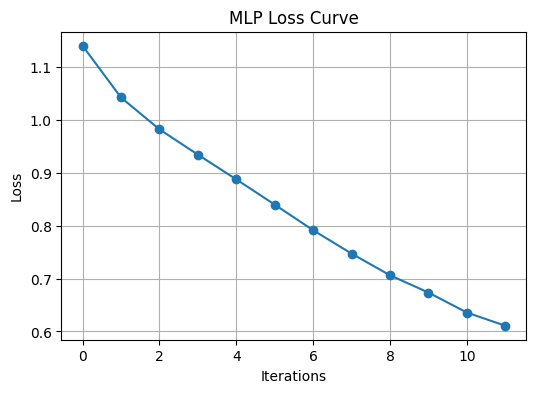

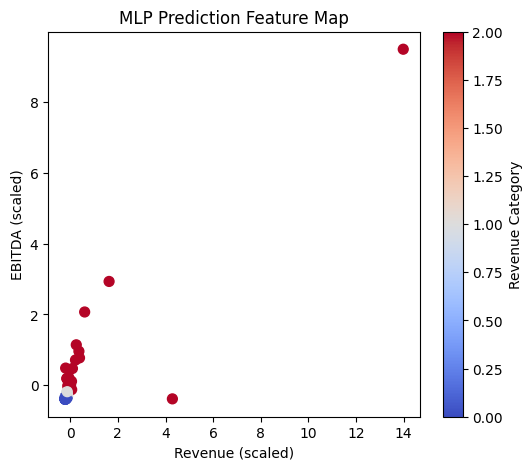

In [22]:
# =========================
# IMPORT LIBRARIES
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# =========================
# CLEAN NUMERIC COLUMNS
# =========================
df['Revenue'] = (
    df['Revenue'].astype(str)
    .str.extract(r'([\d,.]+)')
    .replace(',', '', regex=True)
    .astype(float)
)

df['EBITDA (IN MILLIONS)'] = (
    df['EBITDA (IN MILLIONS)'].astype(str)
    .str.extract(r'([\d,.]+)')
    .replace(',', '', regex=True)
    .astype(float)
)

df_clean = df.dropna(subset=['Revenue', 'EBITDA (IN MILLIONS)'])

# =========================
# CREATE TARGET VARIABLE
# =========================
df_clean['Revenue_cat'] = pd.qcut(
    df_clean['Revenue'],
    q=3,
    labels=[0, 1, 2]
)

# =========================
# FEATURES & TARGET
# =========================
X = df_clean[['Revenue', 'EBITDA (IN MILLIONS)']].values
y = df_clean['Revenue_cat'].values

# =========================
# FEATURE SCALING
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================
# TRAIN / TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# =========================
# MLP CLASSIFIER
# =========================
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50, 30),
    activation='relu',
    solver='adam',
    learning_rate_init=0.01,
    max_iter=500,
    early_stopping=True,
    random_state=42
)

mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

# =========================
# CONFUSION MATRIX
# =========================
print("===== Confusion Matrix: MLP =====")
print(confusion_matrix(y_test, mlp_pred))

# =========================
# METRICS
# =========================
print("\n===== MLP Metrics =====")
print("Accuracy:", accuracy_score(y_test, mlp_pred))
print("Precision (macro):", precision_score(y_test, mlp_pred, average='macro', zero_division=0))
print("Recall (macro):", recall_score(y_test, mlp_pred, average='macro', zero_division=0))
print("F1-score (macro):", f1_score(y_test, mlp_pred, average='macro', zero_division=0))

print("\nClassification Report:\n",
      classification_report(y_test, mlp_pred, zero_division=0))

# =========================
# CROSS VALIDATION
# =========================
cv_scores = cross_val_score(
    mlp,
    X_scaled,
    y,
    cv=5,
    scoring='accuracy'
)

print("5-Fold Cross Validation Accuracy:", cv_scores.mean())

# =========================
# LOSS CURVE
# =========================
plt.figure(figsize=(6,4))
plt.plot(mlp.loss_curve_, marker='o')
plt.title('MLP Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# =========================
# FEATURE MAP (DIFFERENT MAP)
# =========================
plt.figure(figsize=(6,5))
plt.scatter(
    X_test[:,0],
    X_test[:,1],
    c=mlp_pred,
    cmap='coolwarm',
    s=50
)
plt.title('MLP Prediction Feature Map')
plt.xlabel('Revenue (scaled)')
plt.ylabel('EBITDA (scaled)')
plt.colorbar(label='Revenue Category')
plt.show()
